# Classification

We use a variety of models from `Scikit-learn` package for implementing the classifier. The inputs to this classfication problem are:

#### Training dataset: 
* `Author_train_predicted.csv` 
* `Affiliation_train_predicted.csv`
* `Title_training_predicted.csv`
* `Abstract_training_predicted_[mode].csv`


#### Test dataset:
* `Author_test_predicted.csv`
* `Affiliation_test_predicted.csv` 
* `Title_test_predicted.csv`
* `Abstract_test_predicted_[method].csv`

where `mode` can be `nltk`, `textblob`, or `rake`.

## Setup

In [4]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score

As we are dealing with continuous labels, we define a map function to convert these labels to discrete (categorical) labels.

In [5]:
# def map_label(x):
#     if x<2:
#         return 0
#     elif x < 6:
#         return 1
#     else:
#         return 2
intervals = [0.5, 1, 2, 3 , 4, 5, 6 , 7, 10, 15, 20, 30, 40]
labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
def map_label(x):
    for i in xrange(len(intervals)):
        if x<intervals[i]:
            return labels[i]
    return labels[-1]

## Import training data

In [6]:
df_author = pd.read_csv("./data/data_processed/Author_training_predicted.csv")[0:]
df_affiliation = pd.read_csv("./data/data_processed/Affiliation_training_predicted.csv")[0:]
df_title = pd.read_csv("./data/data_processed/Title_training_predicted.csv")[0:]

mode = 1 # 1 for NLTK, 2 for  TextBlob, 3 for RAKE
if mode == 1:
    df_abstract = pd.read_csv("./data/data_processed/Abstract_training_predicted_nltk.csv")[0:]
elif mode == 2:
    df_abstract = pd.read_csv("./data/data_processed/Author_training_predicted_textblob.csv")[0:]
elif mode == 3:
    df_abstract = pd.read_csv("./data/data_processed/Abstract_training_predicted_rake.csv")[0:]
else:
    print('Wrong mode!!')
    
X_train = df_author.copy()
max_num_names = len(X_train.columns) -2
X_train.drop(['Author{x}'.format(x=i) for i in range(0,max_num_names)], axis=1, inplace=True)
X_train['Authors_score'] = X_train['predicted_citations']
X_train.drop(['predicted_citations'], axis=1, inplace=True)

Y_train = df_author["citations_average"].apply(lambda x: map_label(x))

X_train['Affiliations_score'] = df_affiliation['predicted_citations']
X_train['Title_score'] = df_title['predicted_citations']
X_train['Abstract_score'] = df_abstract['predicted_citations'].astype(np.float64)

Xtrain = X_train.copy()

X_train.drop("citations_average", axis=1, inplace=True)

X_train.head()

,Authors_score,Affiliations_score,Title_score,Abstract_score
0,5.612903,2.806452,180.902423,187.447644
1,0.161290,0.161290,96.113563,83.991048
2,7.417339,1.451613,24.349512,116.162506
3,0.709677,0.709677,537.814055,136.688660
4,0.000000,0.000000,16.038629,61.969787


In [7]:
X_train.describe()

,Authors_score,Affiliations_score,Title_score,Abstract_score
count,4368.000000,4368.000000,4368.000000,4368.000000
mean,143.089876,281.742956,172.620120,167.215480
std,464.659888,2007.889477,175.266027,77.916524
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.178030,48.651371,110.714344
50%,11.225000,4.000000,95.591758,157.474776
75%,75.020527,13.568182,269.559422,213.066328
max,8173.600000,48312.506502,1073.033586,529.521645


In [8]:
df_author["citations_average"].describe()

count    4368.000000
mean       12.729096
std        53.212139
min         0.000000
25%         1.000000
50%         3.500000
75%         9.383102
max      2043.400000
Name: citations_average, dtype: float64

In [9]:
labels_list = list(Y_train)
print "In labels for test data:"
print('number of 0s', labels_list.count(0), 'number of 1s', labels_list.count(1), 
      'number of 2s', labels_list.count(2))

In labels for test data:
('number of 0s', 598, 'number of 1s', 383, 'number of 2s', 591)


## Import test data



In [10]:
df_author = pd.read_csv("./data/data_processed/Author_test_predicted.csv")[0:]
df_affiliation = pd.read_csv("./data/data_processed/Affiliation_test_predicted.csv")[0:]
df_title = pd.read_csv("./data/data_processed/Title_test_predicted.csv")[0:]

mode = 1 # 1 for NLTK, 2 for  TextBlob, 3 for RAKE
if mode == 1:
    df_abstract = pd.read_csv("./data/data_processed/Abstract_test_predicted_nltk.csv")[0:]
elif mode == 2:
    df_abstract = pd.read_csv("./data/data_processed/Author_test_predicted_textblob.csv")[0:]
elif mode == 3:
    df_abstract = pd.read_csv("./data/data_processed/Abstract_test_predicted_rake.csv")[0:]
else:
    print('Wrong mode!!')

X_test = df_author.copy()
max_num_names = len(X_test.columns) -2
X_test.drop(['Author{x}'.format(x=i) for i in range(0,max_num_names)], axis=1, inplace=True)
X_test['Authors_score'] = X_test['predicted_citations']
X_test.drop(['predicted_citations'], axis=1, inplace=True)

Y_test = df_author["citations_average"].apply(lambda x: map_label(x))

X_test['Affiliations_score'] = df_affiliation['predicted_citations']
X_test['Title_score'] = df_title['predicted_citations']
X_test['Abstract_score'] = df_abstract['predicted_citations'].astype(np.float64)

Xtest = X_test.copy()

X_test.drop("citations_average", axis=1, inplace=True)


X_test.head()

,Authors_score,Affiliations_score,Title_score,Abstract_score
0,3.032258,3.032258,342.188738,226.145507
1,0.032258,0.032258,306.043302,42.464439
2,2.129032,2.129032,763.662084,308.769021
3,31.176267,2.354839,34.610457,114.649391
4,8.129032,8.129032,698.882140,215.310316


In [11]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((4368, 4), (4368,), (2872, 4), (2872,))

In [12]:
df_author["citations_average"].describe()

count    2872.000000
mean       14.270861
std       112.251230
min         0.000000
25%         1.000000
50%         3.333333
75%         9.000000
max      5289.333333
Name: citations_average, dtype: float64

In [13]:
labels_list = list(Y_train)
print "In labels for training data:"
for i in labels:
    print('number of {t}s'.format(t=i), labels_list.count(i))
labels_list = list(Y_test)
print "In labels for test data:"
for i in labels:
    print('number of {t}s'.format(t=i), labels_list.count(i))

In labels for training data:
('number of 0s', 598)
('number of 1s', 383)
('number of 2s', 591)
('number of 3s', 405)
('number of 4s', 319)
('number of 5s', 248)
('number of 6s', 199)
('number of 7s', 178)
('number of 8s', 412)
('number of 9s', 336)
('number of 10s', 157)
('number of 11s', 190)
('number of 12s', 94)
('number of 13s', 258)
In labels for test data:
('number of 0s', 424)
('number of 1s', 235)
('number of 2s', 393)
('number of 3s', 279)
('number of 4s', 220)
('number of 5s', 156)
('number of 6s', 151)
('number of 7s', 116)
('number of 8s', 223)
('number of 9s', 217)
('number of 10s', 106)
('number of 11s', 111)
('number of 12s', 68)
('number of 13s', 173)


/Users/Mohammad/anaconda/lib/python2.7/site-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


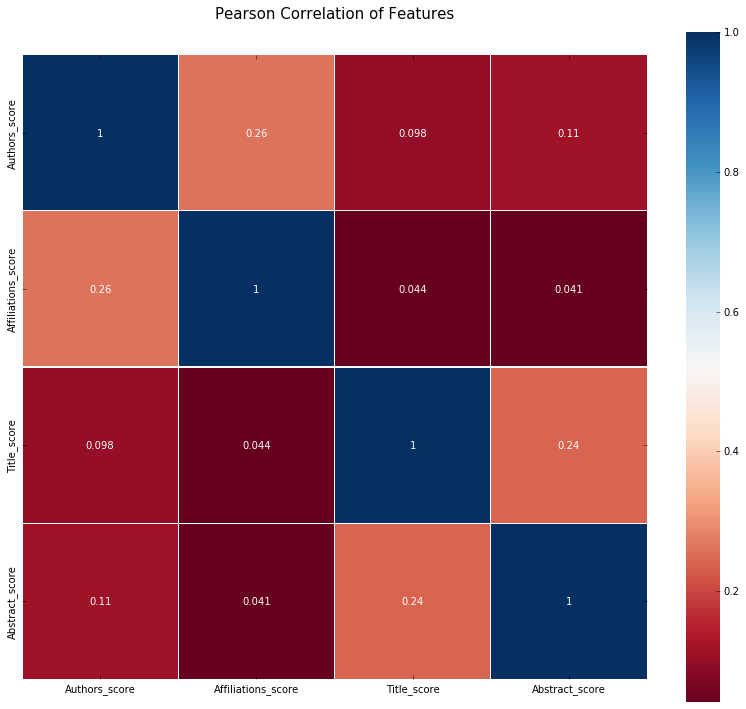

In [14]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

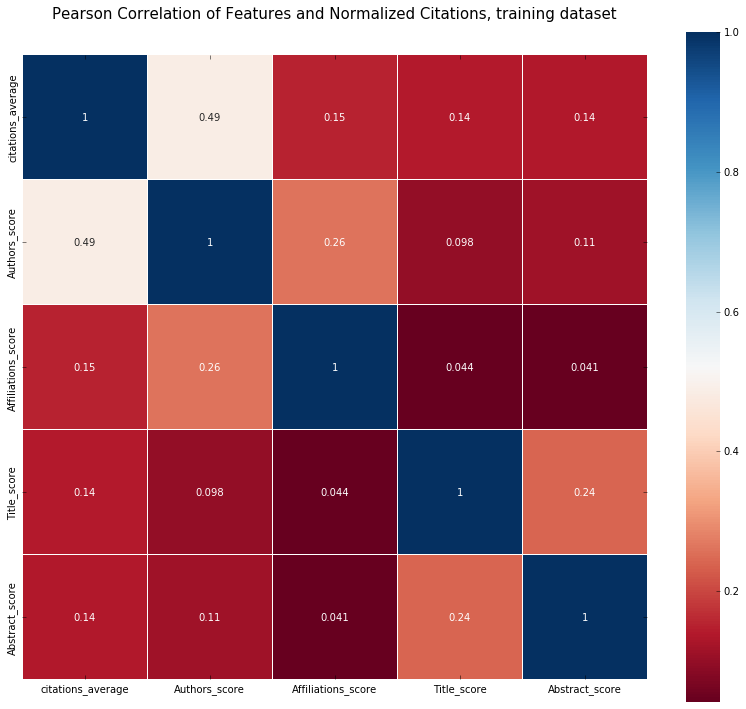

In [15]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features and Normalized Citations, training dataset', y=1.05, size=15)
sns.heatmap(Xtrain.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

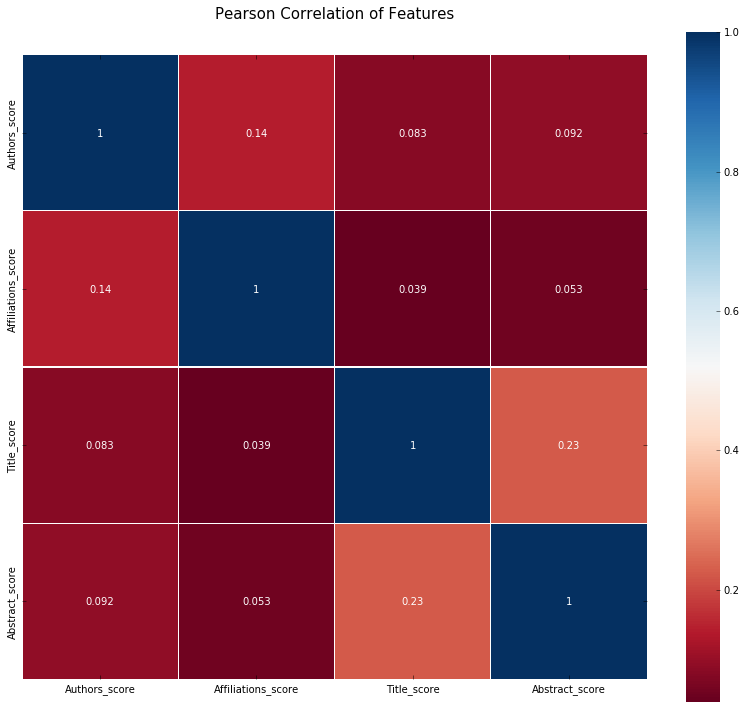

In [16]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_test.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

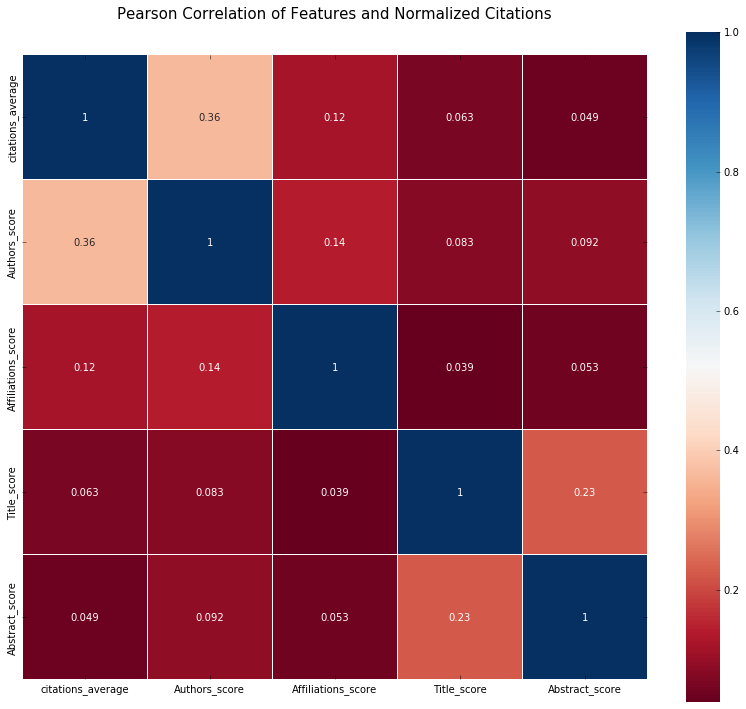

In [17]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features and Normalized Citations', y=1.05, size=15)
sns.heatmap(Xtest.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [18]:
X_train_labeled = X_train.copy()
X_train_labeled['Label'] = Y_train

X_test_labeled = X_test.copy()
X_test_labeled['Label'] = Y_test

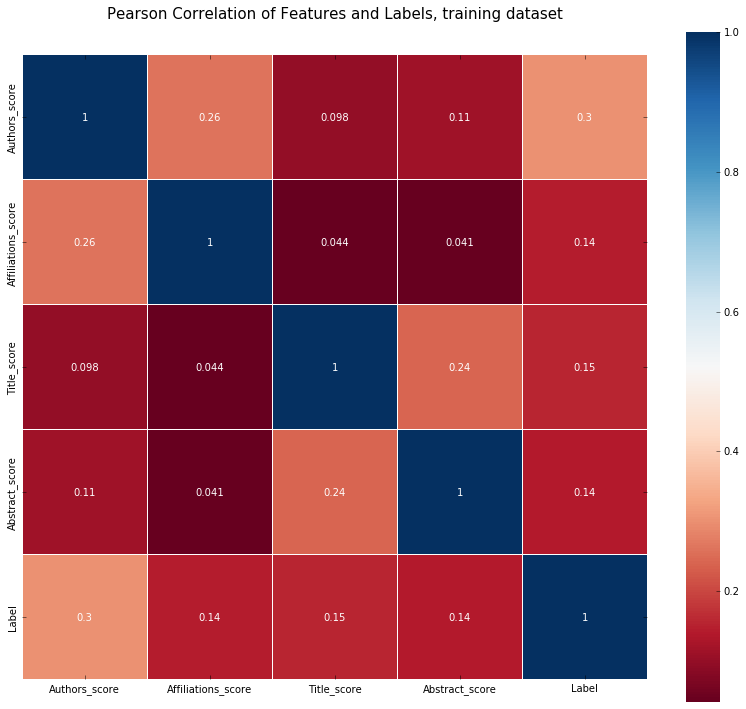

In [19]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features and Labels, training dataset', y=1.05, size=15)
sns.heatmap(X_train_labeled.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

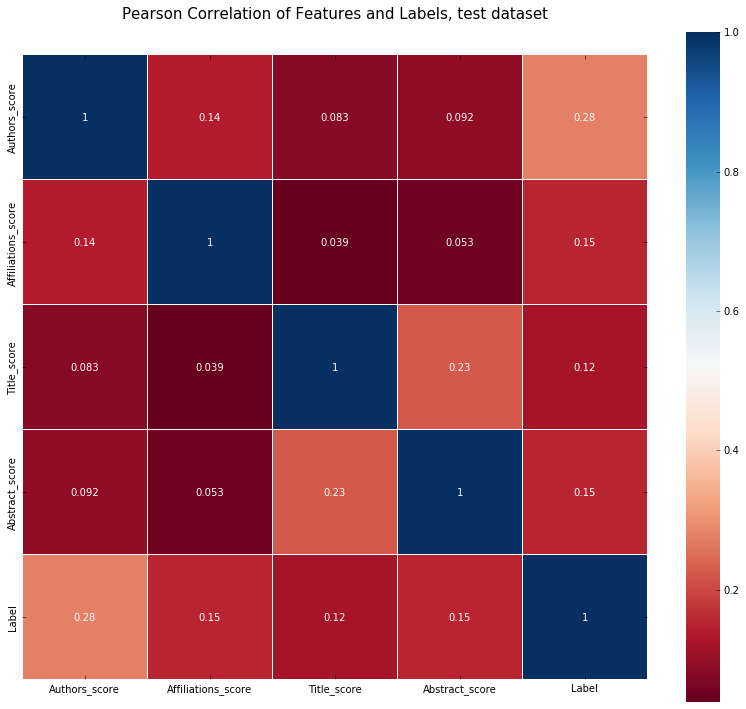

In [20]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features and Labels, test dataset', y=1.05, size=15)
sns.heatmap(X_test_labeled.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

## Classifiers
We consider a wide range of classifiers as follows:

### 1.Dumb Classifier

In [21]:
labels_list = list(Y_train)
l = [labels_list.count(i) for i in labels]
maximizer_label = l.index(max(l))
Y_pred_train = Y_train.copy()
for label in labels:
    Y_pred_train = Y_pred_train.replace(label,maximizer_label)
acc_train_dumb = round(accuracy_score(Y_pred_train, Y_train) * 100, 2)
Y_pred_test = Y_test.copy()
for label in labels:
    Y_pred_test = Y_pred_test.replace(label,maximizer_label)

acc_test_dumb = round(accuracy_score(Y_pred_test, Y_test) * 100, 2)
print(acc_train_dumb, acc_test_dumb)

(13.69, 14.76)


### 2. Logistic Regression


In [22]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_train_logreg = round(logreg.score(X_train, Y_train) * 100, 2)
acc_test_logreg = round(logreg.score(X_test, Y_test) * 100, 2)
print(acc_train_logreg, acc_test_logreg)


(18.34, 17.69)


/Users/Mohammad/anaconda/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Mohammad/anaconda/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### 3. Support Vector Machines


In [23]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_train_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_test_svc = round(svc.score(X_test, Y_test) * 100, 2)
print(acc_train_svc, acc_test_svc)

(99.75, 15.7)


/Users/Mohammad/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### 4. KNN

In [24]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_train_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_test_knn = round(knn.score(X_test, Y_test) * 100, 2)
print(acc_train_knn, acc_test_knn)

(49.73, 17.24)


### 5. Gaussian Naive Bayes


In [25]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_train_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_test_gaussian = round(gaussian.score(X_test, Y_test) * 100, 2)
print(acc_train_gaussian, acc_test_gaussian)

(15.87, 16.3)


### 6. Linear SVC

In [26]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_train_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_test_linear_svc = round(linear_svc.score(X_test, Y_test) * 100, 2)
print(acc_train_linear_svc, acc_test_linear_svc)

(9.91, 10.97)


/Users/Mohammad/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### 7. Stochastic Gradient Descent


In [27]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_train_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_test_sgd = round(sgd.score(X_test, Y_test) * 100, 2)
print(acc_train_sgd, acc_test_sgd)

(18.27, 17.41)


/Users/Mohammad/anaconda/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


### 8. AdaBoost Classifier


In [28]:
adbc = AdaBoostClassifier()
adbc.fit(X_train, Y_train)
Y_pred = adbc.predict(X_test)
acc_train_adbc = round(adbc.score(X_train, Y_train) * 100, 2)
acc_test_adbc = round(adbc.score(X_test, Y_test) * 100, 2)
print(acc_train_adbc, acc_test_adbc)

(25.11, 24.34)


### 9. Gradient Boosting Classifier


In [29]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)
Y_pred = gbc.predict(X_test)
acc_train_gbc = round(gbc.score(X_train, Y_train) * 100, 2)
acc_test_gbc = round(gbc.score(X_test, Y_test) * 100, 2)
print(acc_train_gbc, acc_test_gbc)

(98.24, 90.39)


### 10. XGB Classifier

In [30]:
xgb = XGBClassifier() 
xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)
acc_train_xgb = round(xgb.score(X_train, Y_train) * 100, 2)
acc_test_xgb = round(xgb.score(X_test, Y_test) * 100, 2)
print(acc_train_xgb, acc_test_xgb)

(91.94, 90.77)


### 11. Decision Tree


In [31]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_train_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_test_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
print(acc_train_decision_tree, acc_test_decision_tree)

(100.0, 85.27)


### 12. Random Forest


In [32]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_train_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_test_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
print(acc_train_random_forest, acc_test_random_forest)

(99.95, 90.56)


In [33]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gaussian Naive Bayes',
              'Linear SVC', 'Stochastic Gradient Descent', 'AdaBoost Classifier',
              'Gradient Boosting Classifier', 'XGB Classifier', 'Decision Tree',
              'Random Forest', 'Dumb Classifier'],
    'Training Score': [acc_train_logreg, acc_train_svc, acc_train_knn, acc_train_gaussian, 
                       acc_train_linear_svc, acc_train_sgd, acc_train_adbc, acc_train_gbc, 
                       acc_train_xgb, acc_train_decision_tree, 
                       acc_train_random_forest, acc_train_dumb],
        'Test Score': [acc_test_logreg, acc_test_svc, acc_test_knn, acc_test_gaussian, 
                       acc_test_linear_svc, acc_test_sgd, acc_test_adbc, acc_test_gbc, 
                       acc_test_xgb, acc_test_decision_tree, 
                       acc_test_random_forest, acc_test_dumb]
    })
models.sort_values(by='Test Score', ascending=False)

,Model,Test Score,Training Score
8,XGB Classifier,90.77,91.94
10,Random Forest,90.56,99.95
7,Gradient Boosting Classifier,90.39,98.24
9,Decision Tree,85.27,100.00
6,AdaBoost Classifier,24.34,25.11
0,Logistic Regression,17.69,18.34
5,Stochastic Gradient Descent,17.41,18.27
2,KNN,17.24,49.73
3,Gaussian Naive Bayes,16.30,15.87
1,Support Vector Machines,15.70,99.75


In our classification task, since the number of labels is 3, one baseline approach is to choose of the 0, 1, or 2 labels randomly. This approach results in the accuracy of %33.33 for the training and test sets. A better baseline can be obtained by looking at the training set and find the most frequent label and use it for the test. We call this approach, Dumb Classifier.